In [250]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [251]:
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head(n=15)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [252]:
dataset.shape

(14, 5)

In [253]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [254]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado


Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

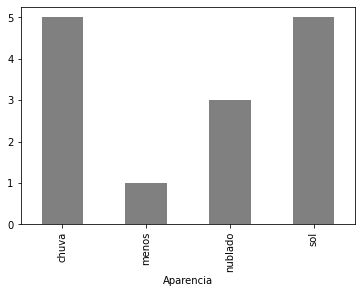

In [255]:
agrupado.plot.bar(color='gray')

In [256]:
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

C:\Users\grafm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

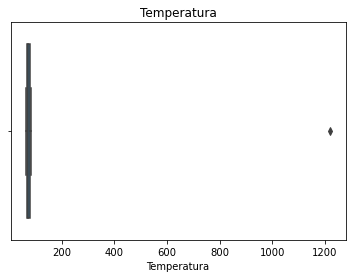

In [257]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

In [258]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [259]:
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

C:\Users\grafm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

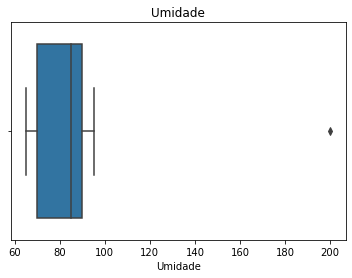

In [260]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

In [261]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [262]:
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [263]:
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [264]:
topAparencia = dataset['Aparencia'].describe().top
topAparencia

'sol'

In [265]:
dataset.loc[~dataset['Aparencia'].isin(['sol','chuva','nublado']), 'Aparencia'] = topAparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [266]:
moda = sts.mode(dataset['Temperatura'])
moda

75

In [267]:
dataset.loc[(dataset['Temperatura'] <= -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = moda

In [268]:
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

Temperatura
64    1
65    1
68    1
69    1
70    1
71    1
72    1
75    3
80    1
81    1
83    1
85    1
dtype: int64

In [269]:
moda = sts.mode(dataset['Umidade'])
moda

70.0

In [270]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = moda

In [271]:
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0    1
70.0    4
75.0    1
80.0    1
85.0    1
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

C:\Users\grafm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

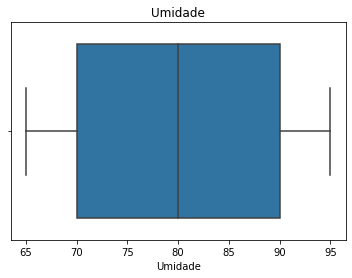

In [272]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

In [273]:
dataset['Umidade'].describe()

count    13.000000
mean     79.769231
std      10.231926
min      65.000000
25%      70.000000
50%      80.000000
75%      90.000000
max      95.000000
Name: Umidade, dtype: float64

In [274]:
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [275]:
moda = sts.mode(dataset['Jogar'])
moda

'sim'

In [276]:
dataset.loc[~dataset['Jogar'].isin(['sim','nao']), 'Jogar'] = moda

In [277]:
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

In [278]:
dataset.head(n=14)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,sol,64,65.0,VERDADEIRO,sim
7,sol,75,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,70.0,NaN,sim
